In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from pathlib import Path
from aging.behavior.syllables import relabel_by_usage
from aging.plotting import figure, save_factory, PlotConfig, format_plots, ONTOGENY_AGE_CMAP, add_identity, legend
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [28]:
format_plots()
c = PlotConfig()

In [29]:
## update data
def filter_df(df):
    max=39
    #df.drop('9c060c9b-9eee-4788-90be-803700bbacd8',level=3, axis=0, inplace=True)
    syll=df.columns.values[df.columns.values>max]
    df.drop(syll,axis=1, inplace=True)
    return df[~df.index.get_level_values('session_name').str.contains('CRL')]

In [30]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

In [31]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/dana_ontogeny_males_relabeled_usage_matrix_v00.parquet')
df_dana = pd.read_parquet(path)

path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_usage_matrix_v00.parquet')
df = pd.read_parquet(path)

# arrange data
data = df.astype(float, errors='ignore')
data= filter_df(data).groupby(['age','uuid']).mean()
data['data'] = 'min'
data.set_index('data', inplace=True, append=True)

data_dana = df_dana.astype(float, errors='ignore')
data_dana= filter_df(data_dana).groupby(['age','uuid']).mean()
data_dana['data'] = 'dana'
data_dana.set_index('data', inplace=True, append=True)

data_all = pd.concat([data,data_dana])
# choose 16 mice from all dataset
n=16
data_all = data_all.groupby('age').apply(lambda x: x.sample(n=n,replace=False) if len(x)>n else x.sample(n=len(x),replace=False)).reset_index(level=0, drop=True)
#data_all = data_all.query('age<16')

In [32]:
usage_mtx= data_all.copy()
data_labels = usage_mtx.index.get_level_values('age').to_numpy()

In [35]:
data_dana

5         11        0   \
age uuid                                 data                                 
3   0514b112-c12c-4785-84bd-93a8b40235e9 dana  0.030545  0.001041  0.047206   
    0609d499-88e2-482b-8fef-70cbcd8e065a dana  0.016955  0.001060  0.052985   
    183c7534-404c-4071-9b7f-7285d7459409 dana  0.004161  0.000000  0.032594   
    1cd99d3b-cf22-4b80-b97a-bfd3bcff088d dana  0.013879  0.002031  0.040623   
    2b5a857f-2e64-470c-801e-1149450c6f56 dana  0.031599  0.001277  0.037344   
...                                                 ...       ...       ...   
90  b365ea6a-369f-4991-b139-15694dc1c86d dana  0.023737  0.008217  0.085210   
    b7b7dfa0-66e1-4f48-a118-2fec4b8ce144 dana  0.001504  0.023693  0.146672   
    b878ffa4-ab8b-42bb-821a-f8bb23af1959 dana  0.024031  0.056202  0.086434   
    e272b7f4-3fe2-4fba-8ae9-0b1f8da43f69 dana  0.010531  0.005265  0.157086   
    fffeff2c-94ab-42aa-ab9a-420a58e32679 dana  0.005054  0.021773  0.113142   

                                                     3         12        20  \
age uuid                                 data                                 
3   0514b112-c12c-4785-84bd-93a8b40235e9 dana  0.023950  0.027074  0.047553   
    0609d499-88e2-482b-8fef-70cbcd8e065a dana  0.008124  0.015895  0.043801   
    183c7534-404c-4071-9b7f-7285d7459409 dana  0.015603  0.026699  0.036408   
    1cd99d3b-cf22-4b80-b97a-bfd3bcff088d dana  0.017942  0.024374  0.032498   
    2b5a857f-2e64-470c-801e-1149450c6f56 dana  0.024258  0.027450  0.041175   
...                                                 ...       ...       ...   
90  b365ea6a-369f-4991-b139-15694dc1c86d dana  0.072124  0.011869  0.004260   
    b7b7dfa0-66e1-4f48-a118-2fec4b8ce144 dana  0.054156  0.019556  0.000752   
    b878ffa4-ab8b-42bb-821a-f8bb23af1959 dana  0.039922  0.008140  0.005039   
    e272b7f4-3fe2-4fba-8ae9-0b1f8da43f69 dana  0.064063  0.004388  0.001316   
    fffeff2c-94ab-42aa-ab9a-420a58e32679 dana  0.061431  0.012830  0.000000   

                                                     32        13        4   \
age uuid                                 data                                 
3   0514b112-c12c-4785-84bd-93a8b40235e9 dana  0.003471  0.011107  0.021867   
    0609d499-88e2-482b-8fef-70cbcd8e065a dana  0.003532  0.015542  0.058637   
    183c7534-404c-4071-9b7f-7285d7459409 dana  0.001387  0.006588  0.030860   
    1cd99d3b-cf22-4b80-b97a-bfd3bcff088d dana  0.001016  0.010156  0.030129   
    2b5a857f-2e64-470c-801e-1149450c6f56 dana  0.002873  0.017236  0.019470   
...                                                 ...       ...       ...   
90  b365ea6a-369f-4991-b139-15694dc1c86d dana  0.005478  0.021911  0.014607   
    b7b7dfa0-66e1-4f48-a118-2fec4b8ce144 dana  0.001128  0.013539  0.028206   
    b878ffa4-ab8b-42bb-821a-f8bb23af1959 dana  0.001938  0.023256  0.041473   
    e272b7f4-3fe2-4fba-8ae9-0b1f8da43f69 dana  0.000878  0.013602  0.014480   
    fffeff2c-94ab-42aa-ab9a-420a58e32679 dana  0.001944  0.026439  0.049767   

                                                     33  ...        24  \
age uuid                                 data            ...             
3   0514b112-c12c-4785-84bd-93a8b40235e9 dana  0.003818  ...  0.056925   
    0609d499-88e2-482b-8fef-70cbcd8e065a dana  0.001413  ...  0.038856   
    183c7534-404c-4071-9b7f-7285d7459409 dana  0.001040  ...  0.061720   
    1cd99d3b-cf22-4b80-b97a-bfd3bcff088d dana  0.004062  ...  0.038592   
    2b5a857f-2e64-470c-801e-1149450c6f56 dana  0.006703  ...  0.045962   
...                                                 ...  ...       ...   
90  b365ea6a-369f-4991-b139-15694dc1c86d dana  0.007912  ...  0.014912   
    b7b7dfa0-66e1-4f48-a118-2fec4b8ce144 dana  0.005641  ...  0.000752   
    b878ffa4-ab8b-42bb-821a-f8bb23af1959 dana  0.018605  ...  0.001163   
    e272b7f4-3fe2-4fba-8ae9-0b1f8da43f69 dana  0.010970  ...  0.002194   
    fffeff2c-94ab-42aa-ab9a-420a58e32679 dana  0.013219  ...  0.000000   

      

In [7]:
from sklearn.decomposition import PCA

In [8]:
latents = PCA(n_components=2).fit_transform(usage_mtx)

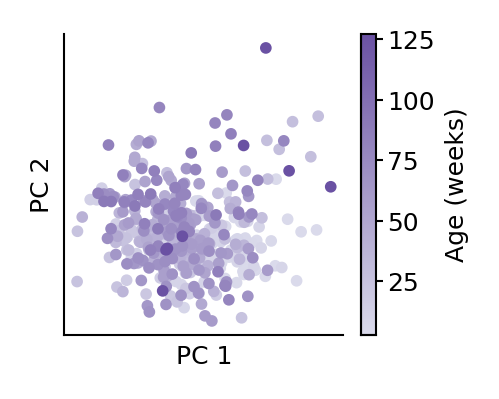

In [9]:
fig = figure(1.5, 1.3)
ax = fig.gca()
im = ax.scatter(*latents.T, c=usage_mtx.index.get_level_values('age'), cmap=ONTOGENY_AGE_CMAP, s=4)
ax.set(xlabel='PC 1', ylabel='PC 2', xticks=[], yticks=[])
fig.colorbar(im, label="Age (weeks)")
sns.despine()
#saver(fig, 'pca-usage-ontogeny-males');

In [10]:
corr = pd.DataFrame({'pc1': latents[:, 0], 'age': usage_mtx.index.get_level_values('age')}).corr(method='spearman').loc['pc1', 'age']

In [11]:
corr

-0.2505066572790314

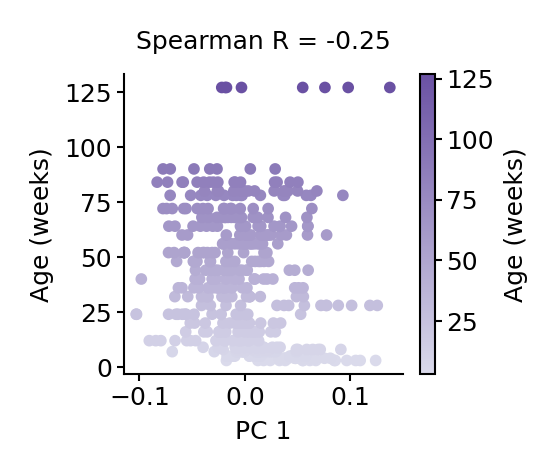

In [12]:
fig = figure(1.5, 1.3)
ax = fig.gca()
im = ax.scatter(latents[:, 0], usage_mtx.index.get_level_values('age'), c=usage_mtx.index.get_level_values('age'), cmap=ONTOGENY_AGE_CMAP, s=4)
sns.despine()
ax.set(xlabel='PC 1', ylabel='Age (weeks)', title=f'Spearman R = {corr:.2f}')
fig.colorbar(im, label="Age (weeks)")
#saver(fig, 'pc-vs-age-ontogeny-males');

In [13]:
pca = PCA().fit(usage_mtx)

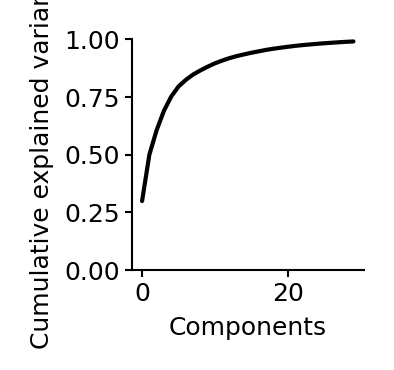

In [14]:
fig = figure(1, 1)
ax = fig.gca()
ax.plot(np.cumsum(pca.explained_variance_ratio_)[:30], color='k')
ax.set(xlabel='Components', ylabel='Cumulative explained variance', ylim=(0, 1))
sns.despine()
#saver(fig, 'pca-cumulative-variance');

## Aging dynamics using GP smoothing

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from toolz import valmap, keyfilter

In [16]:
age_scaler = StandardScaler()
x = usage_mtx.index.get_level_values("age")
x = age_scaler.fit_transform(x.to_numpy()[:, None])
time = np.linspace(np.min(x), np.max(x), 300)[:, None]

In [17]:
kernel = 1 * RBF(length_scale=5e2, length_scale_bounds=(1e-3, 1e3))

out = {}
grads = {}

index = pd.Index(age_scaler.inverse_transform(time).squeeze(), name="age")

r2_scores = {}

for syll in tqdm(usage_mtx.columns.to_numpy()):
    y = usage_mtx[syll]
    gp = GaussianProcessRegressor(
        kernel=kernel, n_restarts_optimizer=5, alpha=1.125, normalize_y=True
    )
    gp.fit(x, y)
    r2_scores[syll] = gp.score(x, y)
    grads[syll] = np.gradient(gp.predict(time), time.squeeze())
    out[syll] = pd.Series(gp.predict(time), index=index, name="Predicted usage")

  0%|          | 0/40 [00:00<?, ?it/s]

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [18]:
score_thresh = 0.2
# drop_sylls = [29, 47]
#drop_sylls = [29, 47, 37, 66, 67]
drop_sylls=[]
keep_grads = keyfilter(lambda k: (r2_scores[k] > score_thresh) and (k not in drop_sylls), grads)

<Axes: xlabel='age', ylabel='5'>

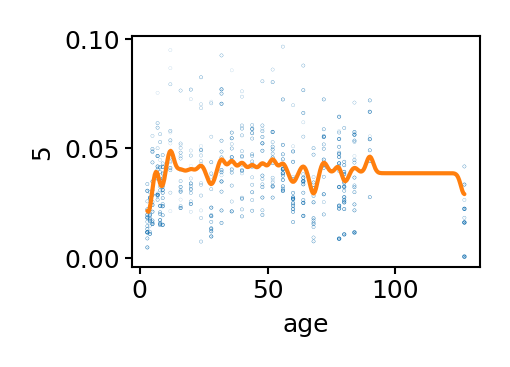

In [19]:
fig = figure(1.5, 1)
ax = fig.gca()
usage_mtx.reset_index().plot(kind='scatter', y=usage_mtx.columns.to_numpy()[0], x='age', s=10, ax=ax)
out[usage_mtx.columns.to_numpy()[0]].plot(ax=ax, c='C1')

In [20]:
# for k, v in keep_grads.items():
#     v[np.abs(v) > 0.07] = np.mean(v[np.abs(v) < 0.07])

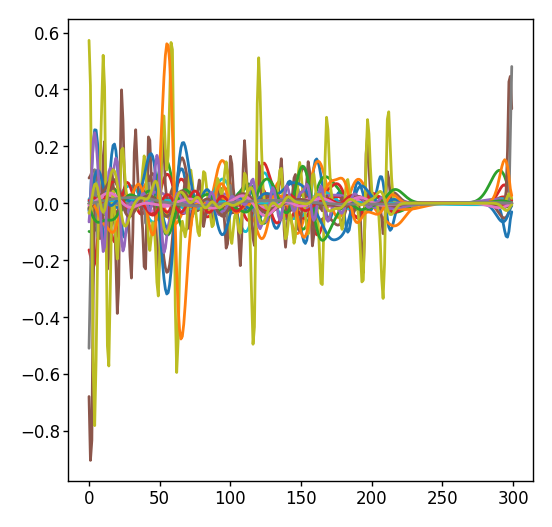

In [21]:
for k, v in keep_grads.items():
    plt.plot(v, label=k)

/n/groups/datta/win/longtogeny/code/aging/plotting.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  return plt.figure(figsize=(width, height), dpi=dpi, **kwargs)


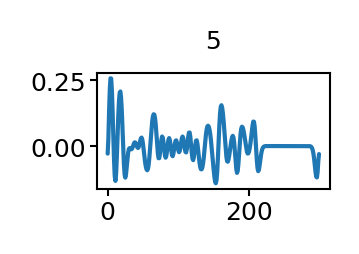

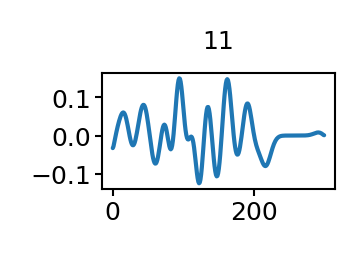

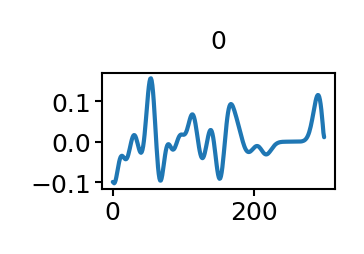

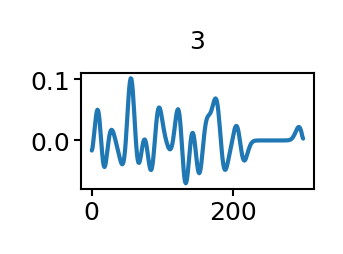

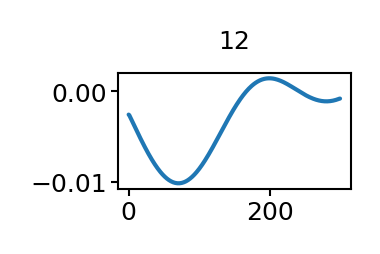

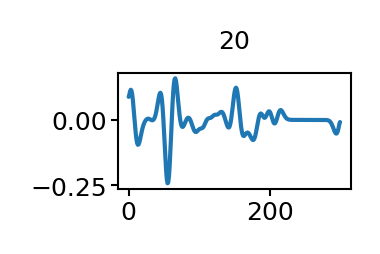

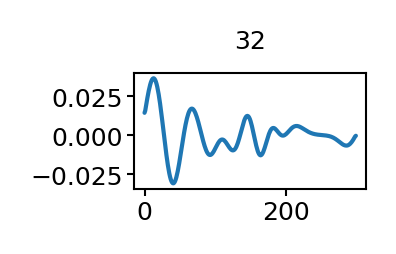

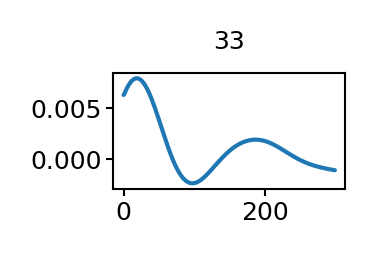

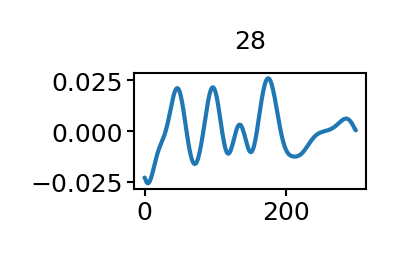

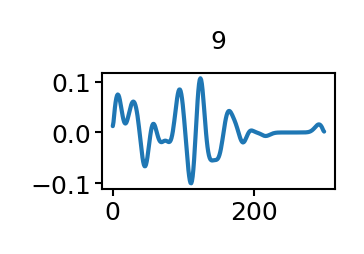

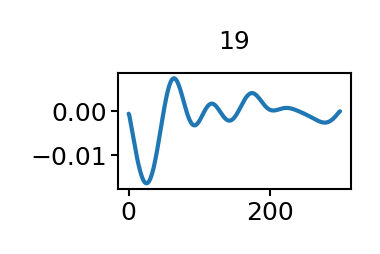

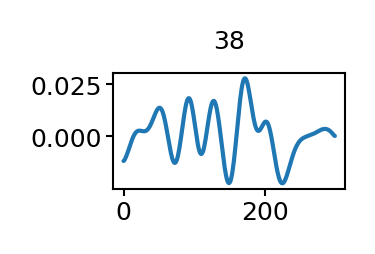

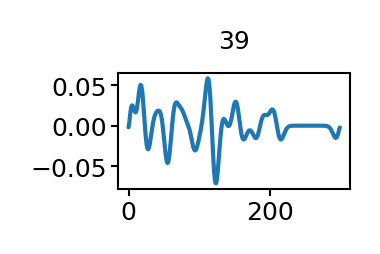

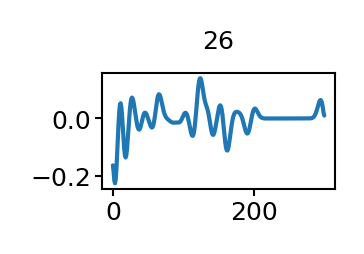

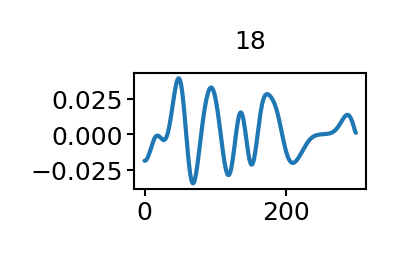

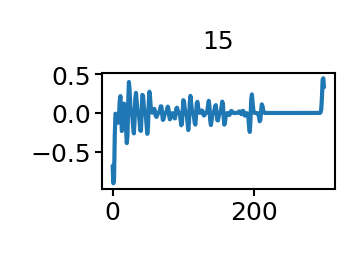

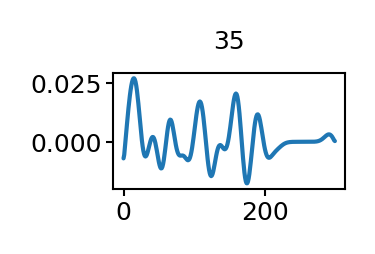

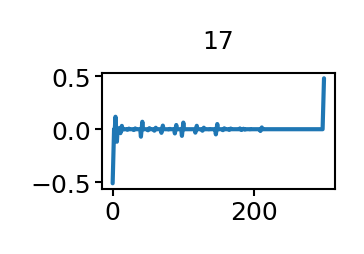

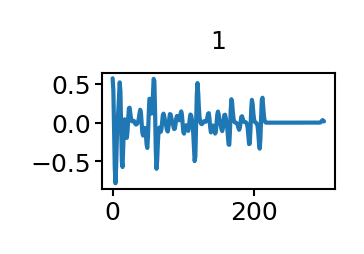

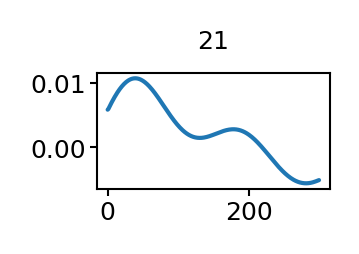

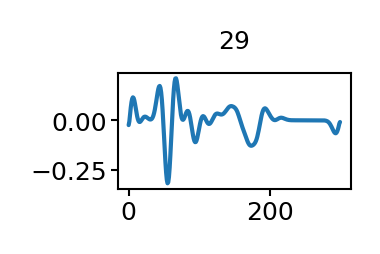

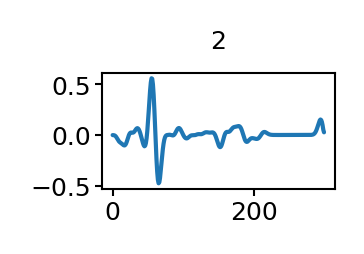

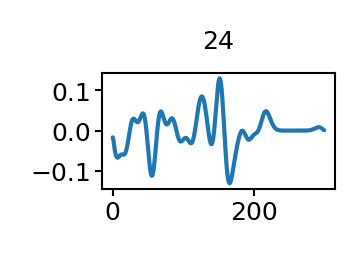

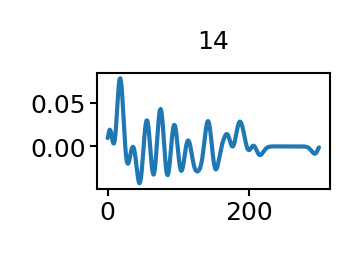

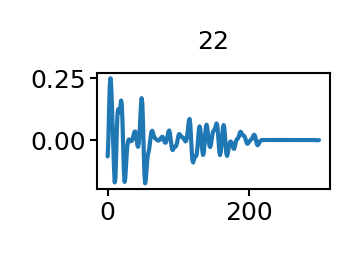

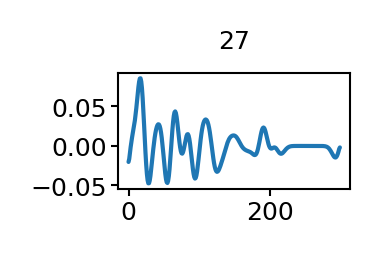

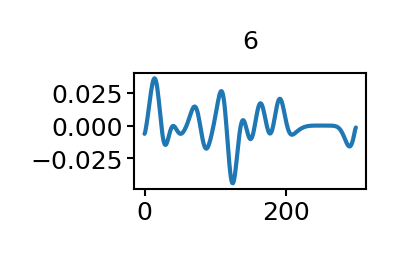

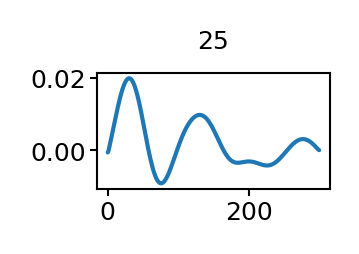

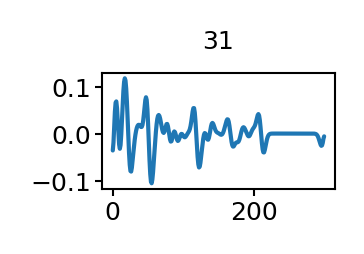

In [22]:
for k, v in keep_grads.items():
    figure(1, 0.5)
    plt.plot(v)
    plt.title(k)

In [23]:
grad_array = np.array(list(keep_grads.values()))

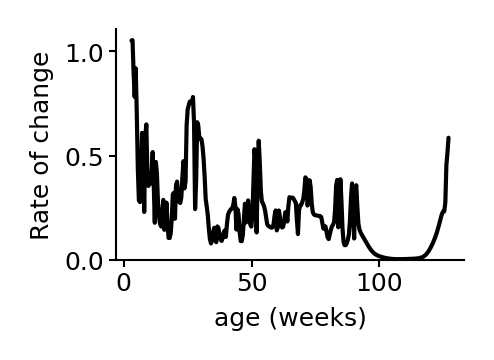

In [24]:
fig = figure(1.5, 1)
plt.plot(age_scaler.inverse_transform(time), np.linalg.norm(grad_array, axis=0), c='k')
plt.ylabel("Rate of change", fontsize=6)
plt.xlabel('age (weeks)')
plt.ylim(0, None)
sns.despine()
# saver(fig, "ontogeny-syllable-rate-of-change");

## Cluster syllable usage

In [25]:
from sklearn.cluster import KMeans

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0 [Index([11, 33, 28, 38, 18, 35, 36, 21, 25], dtype='object')]
Cluster 1 [Index([12, 4, 19, 34, 17, 16, 37], dtype='object')]
Cluster 2 [Index([20, 9, 7, 23, 1, 24], dtype='object')]
Cluster 3 [Index([0, 3, 26, 15, 8, 2, 10], dtype='object')]
Cluster 4 [Index([5, 32, 13, 39, 29, 14, 22, 27, 30, 6, 31], dtype='object')]


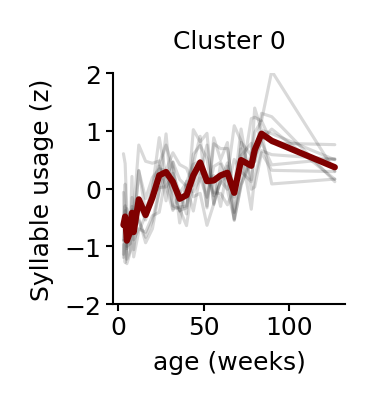

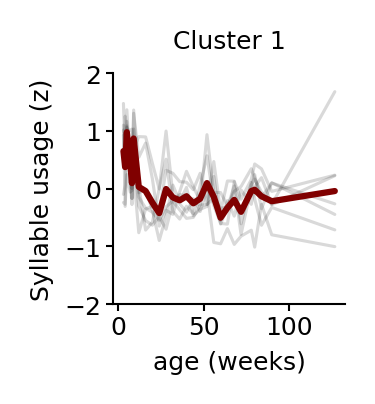

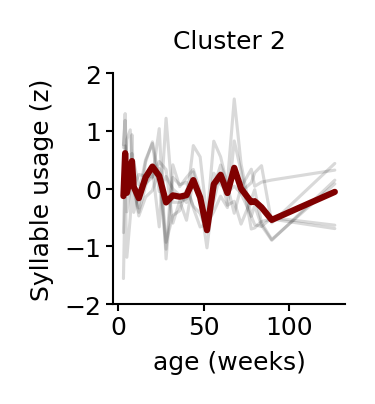

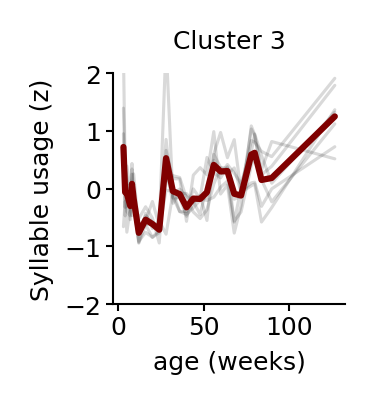

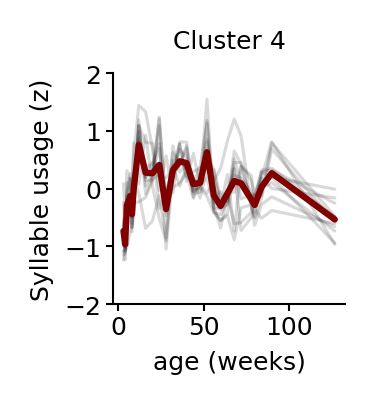

In [26]:
n_clusters = 5
clusters = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(StandardScaler().fit_transform(usage_mtx).T)
scaled_df = pd.DataFrame(StandardScaler().fit_transform(usage_mtx), index=usage_mtx.index, columns=usage_mtx.columns.to_numpy())
for i in range(n_clusters):
    fig = figure(1, 1)
    tmp = scaled_df.iloc[:, clusters == i].groupby('age').mean()
    print(f'Cluster {i}', [tmp.columns])
    plt.plot(tmp, c='k', lw=0.75, alpha=0.15)
    plt.plot(tmp.mean(1), c='maroon', lw=1.5)
    plt.title(f'Cluster {i}')
    plt.xlabel('age (weeks)')
    plt.ylabel('Syllable usage (z)')
    plt.ylim([-2,2])
    sns.despine()
    #saver(fig, f'ontogeny-syllable-cluster-{i}')

In [ ]:
## clustering over ages